## original  thomas wiecki

https://twiecki.io/blog/2018/05/03/copulas/

and

https://de.mathworks.com/help/stats/simulating-dependent-random-variables-using-copulas.html;jsessionid=b5b610b45a1c9acd362cf79fbfd7

and

https://github.com/tensorflow/probability/blob/master/tensorflow_probability/examples/jupyter_notebooks/Gaussian_Copula.ipynb

In [2]:
%matplotlib inline

import seaborn as sns
from scipy import stats

## how to transform from any distribution to uniform and back. 

In math-speak this is called the probability integral transform.

## Gaussian

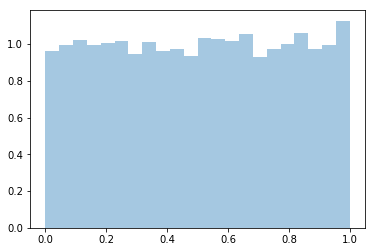

In [3]:
x = stats.uniform(0, 1).rvs(10000)
sns.distplot(x, kde=False, norm_hist=True);

### compute inverse of the cumulative density function (CDF) of the normal distribution

Applying the inverse CDF of any distribution F to a U(0,1) random variable results in a random variable whose distribution is exactly F. This is known as the Inversion Method.

Applying the normal CDF to a standard normal random variable results in a uniform random variable

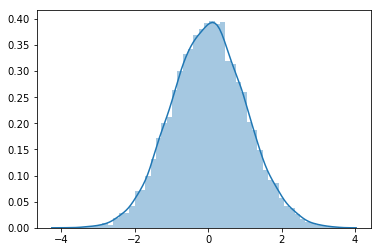

In [4]:
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans);

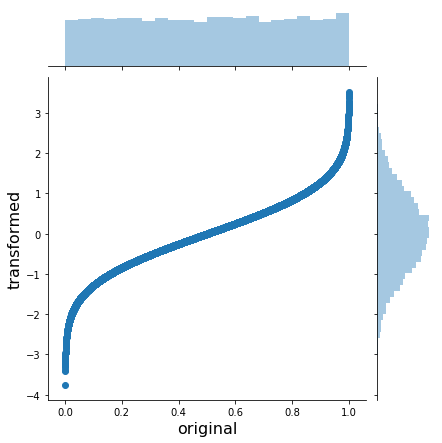

In [5]:
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

## beta

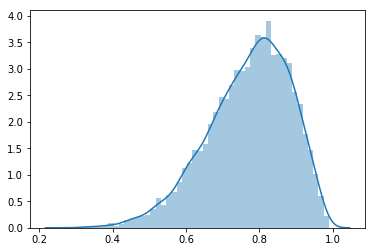

In [7]:
beta = stats.distributions.beta(a=10, b=3)
x_trans = beta.ppf(x)
sns.distplot(x_trans)

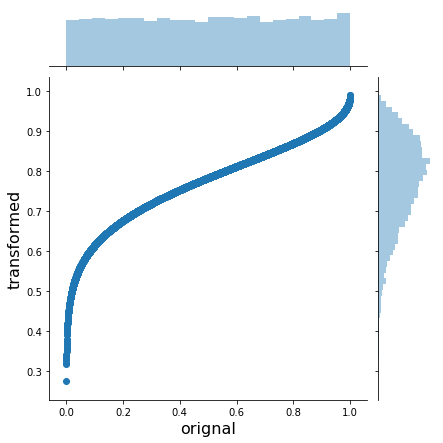

In [8]:
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('orignal', 'transformed', fontsize=16);

## Gumbel

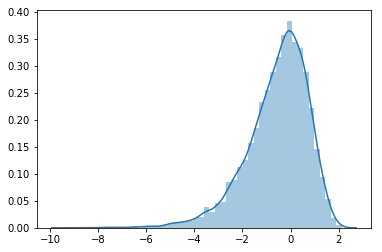

In [9]:
gumbel = stats.distributions.gumbel_l()
x_trans = gumbel.ppf(x)
sns.distplot(x_trans)

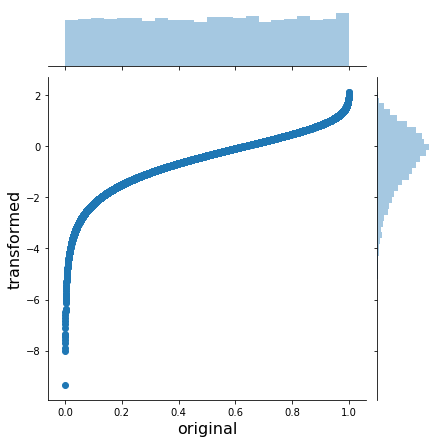

In [10]:
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

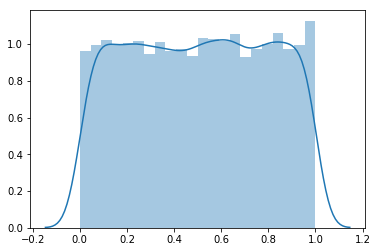

In [11]:
x_trans_trans = gumbel.cdf(x_trans)
sns.distplot(x_trans_trans)


## back to original

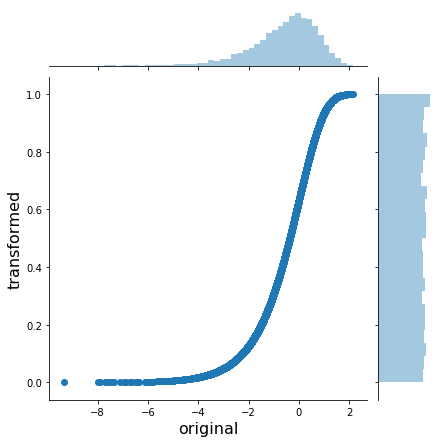

In [12]:

h = sns.jointplot(x_trans, x_trans_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

## creating a custom joint probability distribution

<i> After a univariate transformation of each of the (univariate) random variables involved in the multivariate distribution to uniformity, the joint distribution that results is called a copula. If you then transform each of the individual random variables (changing the "marginals"), the copula is unchanged, even though the multivariate distribution is changed </i>

https://stats.stackexchange.com/a/135687/213086

https://en.wikipedia.org/wiki/Marginal_distribution

Sklar’s Theorem separates the modeling of the marginal distributions from the dependence structure

 Copulas are functions that describe dependencies among variables, and provide a way to create distributions to model correlated multivariate data. Using a copula, a data analyst can construct a multivariate distribution by specifying marginal univariate distributions, and choosing a particular copula to provide a correlation structure between variables
 
 https://de.mathworks.com/help/stats/simulating-dependent-random-variables-using-copulas.html;jsessionid=b5b610b45a1c9acd362cf79fbfd7

In [15]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
# Generate random samples from multivariate normal with correlation .5
x = mvnorm.rvs(100000)

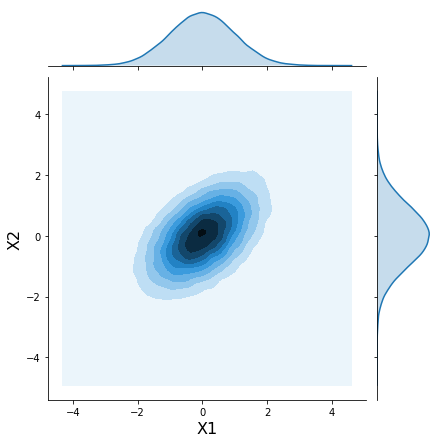

In [17]:
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

uniformify the marginals:

In [ ]:
norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)
h.set_axis_labels('Y1', 'Y2', fontsize=16);

 transform the marginals to desired distribution

In [ ]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);
h.set_axis_labels('Maximum river level', 'Probablity of flooding', fontsize=16);

 compare to joint distribution without correlations:

In [ ]:
x1 = m1.rvs(10000)
x2 = m2.rvs(10000)

h = sns.jointplot(x1, x2, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);
h.set_axis_labels('Maximum river level', 'Probablity of flooding',  fontsize=16);